# Итоговое задание

Вас пригласили поучаствовать в одном из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру. 

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

И сделать это можно с помощью модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы (вот она, сила ML!). Чтобы определиться с параметрами будущей модели, проведите разведывательный анализ данных и составьте отчёт по его результатам. 

Ниже вы найдете пошаговую инструкцию по выполнению проекта.

### Описание датасета
Посмотрим на переменные, которые содержит датасет:
1. *`school`* — аббревиатура школы, в которой учится ученик
2. *`sex`* — пол ученика ('F' - женский, 'M' - мужской)
3. *`age`* — возраст ученика (от 15 до 22)
4. *`address`* — тип адреса ученика ('U' - городской, 'R' - за городом)
5. *`famsize`* — размер семьи('LE3' <= 3, 'GT3' >3)
6. *`Pstatus`* — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
7. *`Medu`* — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
8. *`Fedu`* — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
9. *`Mjob`* — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
10. *`Fjob`* — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
11. *`reason`* — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
12. *`guardian`* — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
13. *`traveltime`* — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
14. *`studytime`* — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
15. *`failures`* — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
16. *`schoolsup`* — дополнительная образовательная поддержка (yes или no)
17. *`famsup`* — семейная образовательная поддержка (yes или no)
18. *`paid`* — дополнительные платные занятия по математике (yes или no)
19. *`activities`* — дополнительные внеучебные занятия (yes или no)
20. *`nursery`* — посещал детский сад (yes или no)
21. *`higher`* — хочет получить высшее образование (yes или no)
22. *`internet`* — наличие интернета дома (yes или no)
23. *`romantic`* — в романтических отношениях (yes или no)
24. *`famrel`* — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
25. *`freetime`* — свободное время после школы (от 1 - очень мало до 5 - очень мого)
26. *`goout`* — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
27. *`health`* — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
28. *`absences`* — количество пропущенных занятий
29. *`score`* — баллы по госэкзамену по математике

### `Рекомендации по выполнению проекта`
1. Проведите ***первичную обработку*** данных. Так как данных много, стоит написать функции, которые можно применять к столбцам определённого типа.
2. Посмотрите на ***распределение признака*** для числовых переменных, устраните выбросы.
3. Оцените количество ***уникальных значений*** для номинативных переменных.
4. По необходимости ***преобразуйте*** данные
5. Проведите ***корреляционный анализ*** количественных переменных
6. Отберите ***не коррелирующие*** переменные.
7. Проанализируйте номинативные переменные и устраните те, которые ***не влияют*** на предсказываемую величину (в нашем случае — на переменную score).
8. Не забудьте ***сформулировать выводы*** относительно качества данных и тех переменных, которые вы будете использовать в дальнейшем построении модели.

##### Выстроим ряд гипотез, основываясь на описании столбцов и логике:
1. *`school`* — НЕ влияет на успеваемость
2. *`sex`* — НЕ влияет
3. *`age`* — НЕ влияет, либо влияет МИНИМАЛЬНО
4. *`address`* — НЕ влияет, либо влияет МИНИМАЛЬНО
5. *`famsize`* — НЕ влияет, либо влияет МИНИМАЛЬНО
6. *`Pstatus`* — Влияет на успеваемость
7. *`Medu`* — СИЛЬНО влияет на успеваемость.
8. *`Fedu`* — СИЛЬНО влияет на успеваемость.
9. *`Mjob`* — СИЛЬНО влияет на успеваемость.
10. *`Fjob`* — СИЛЬНО влияет на успеваемость.
11. *`reason`* — НЕ влияет, либо влияет МИНИМАЛЬНО
12. *`guardian`* — НЕ влияет, либо влияет МИНИМАЛЬНО
13. *`traveltime`* — Влияет. Больше времени на дорогу - больше усталось, меньше желания учиться
14. *`studytime`* — СИЛЬНО влияет на успеваемость, оказывает самое непосредственное влияние
15. *`failures`* — СИЛЬНО влияет на успеваемость, т.к. вызывает проблемы с мотивацией
16. *`schoolsup`* — СИЛЬНО влияет на успеваемость.
17. *`famsup`* — СИЛЬНО влияет на успеваемость.
18. *`paid`* — СИЛЬНО влияет на успеваемость.
19. *`activities`* — НЕ влияет, либо минимально, т.к. не связаны с математикой
20. *`nursery`* — НЕ влияет, либо МИНИМАЛЬНО
21. *`higher`* — Влияет
22. *`internet`* — НЕ влияет, либо МИНИМАЛЬНО
23. *`romantic`* — Влияет, т.к. ученик начинает думать о другом (из личного опыта)
24. *`famrel`* — СИЛЬНО влияет. Как мне кажется, отношения в семье сильно влияют на настроение и желание добиваться успехов в чем-либо.
25. *`freetime`* — Влияет. Причем здесь необходима "золотая середина". Слишком мало времени - больше усталости, слишком много - больше отвлекается от учебы.
26. *`goout`* — Аналогично freetime
27. *`health`* — Влияет.
28. *`absences`* — СИЛЬНО влияет, т.к. имеет самое непосредственное отношение к учебе
29. *`score`* — А это уже результат, который мы и проверяем
---

## Подготовка к работе
***Импорт библиотек и чтение файла***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

# буду использовать 2 датасета, чтобы сравнить, как будут разниться данные с заменой NaN и без замены
students = pd.read_csv('stud_math.csv')  # датасет с заменой данных
stud_original = pd.read_csv('stud_math.csv')  # датасет с минимальными изменениями

##### Рассмотрим, какие данные хранятся в файле и какие типы данных у столбцов:

In [2]:
display(students.head(10))
students.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

1. Строковых - 17
2. Числовых - 13

***Здесь будут вспомогательные функции, которые будут использованы далее***

In [3]:
def display_info(df, column):
    '''вывод первичной информации о столбце. на входе - столбец датафрейма и название столбца'''
    display(pd.DataFrame(df[column].value_counts()))
    #print("Значений, встретившихся в столбце более 10 раз:", (x.value_counts()>10).sum())
    print("Уникальных значений:", df[column].nunique())
    df.loc[:, [column]].info()


def get_boxplot(df, column):
    '''построение графика'''
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=df.loc[df.loc[:, column].isin(df.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

 
def get_stat_dif(df, column):
    '''тест Стьюдента'''
    cols = df.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'], 
                        df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break
            

def stat_column(column):
    '''подведение статистики по верхним и нижним границам, вычисление квартилей'''
    mean_num = column.mean()
    perc25 = column.quantile(0.25)
    perc50 = column.quantile(0.50)
    perc75 = column.quantile(0.75)
    IQR = perc75 - perc25
    bottom_bound = perc25 - 1.5*IQR
    top_bound = perc75 + 1.5*IQR
#     count_lower = column[column < bottom_bound].value_counts()
#     count_upper = column[column > top_bound].value_counts()
    print(f'Среднее значение: {mean_num}\n',
        f'25-й перцентиль: {perc25}\n',
        f'50-й перцентиль: {perc50}\n',
        f'75-й перцентиль: {perc75}\n',
        f'IQR: {IQR}\n',
        f'Границы выбросов: [{bottom_bound}, {top_bound}]\n')
#          f'Количество выбросов ниже и выше границ: [{count_lower}, {count_upper}]')


def refill_nan(df, column):
    '''Заполняет пропуски на медианой или модой'''
    refill = None  # Переменная, будет в себе хранить медиану или моду
    
    if df[column].dtypes in ['int64', 'float64']:
        refill = df[column].median()
    if df[column].dtypes in ['object', 'O']:
        refill = df[column].mode()[0]
    
    if refill != 0:
        df[column].fillna(refill, inplace=True)

    return df

def start_refill(df):
    '''запуск замены пустых значений'''
    for col in df.columns:
        refill_nan(df, col)

# Устал прописывать одно и то же по 10 раз, написал коротенькую функцию
def show_info(df, column):
    '''Показывает первичную информацию по колонке'''
    print(f'========================================\nВывод значений:')
    display(df[column].value_counts(dropna = False))
    print(f'========================================\nВывод процентного соотношения:')
    display(df[column].value_counts(dropna = False, normalize = True))
    print(f'========================================\nВывод общей информации:')
    display_info(df, column)
    if df[column].dtypes in ['int64', 'float64']:  # Если значения числовые
        print(f'\n========================================\nПервичная статистика (квартили, границы):')
        stat_column(df[column])
    print(f'\n========================================\nГрафик:')
    df[column].hist()

## Рассмотрим столбцы

Заранее определим на будущее ряд правил:
1. Заменяем пустые значения на:
    * Моду, если тип строковый
    * Медиану, если тип числовой
    * Пустые в оригинальном файле, чтобы не исключить возможное влияние на статистику
2. При наличии выбросов не забываем пользоваться логикой.
    * в оригинальном файле совсем странные значения будем менять на пустые. Если значения похожи на другие, то заменяем на похожие
    * в файле с заменой данных будем менять не на пустые, а медиану
3. Чтобы не путаться в названиях из-за регистров, приведем все названия колонок к нижнему регистру

In [4]:
students.columns = students.columns.map(lambda x: x.lower())
stud_original.columns = stud_original.columns.map(lambda x: x.lower())

Как мы уже видели, почти во всех столбцах есть пустые значения. Больше всего их в столбце pstatus

In [5]:
students.pstatus.value_counts(dropna = False, normalize = True)

T      0.794937
NaN    0.113924
A      0.091139
Name: pstatus, dtype: float64

Таким образом мы понимаем, что самый большой процент пустых значений по столбцам - 11,7%
Попробуем заменить на моду/медиану все пропуски и проанализировать. В конце сравним с оригиналом

In [6]:
start_refill(students)

students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              395 non-null    object 
 4   famsize              395 non-null    object 
 5   pstatus              395 non-null    object 
 6   medu                 395 non-null    float64
 7   fedu                 395 non-null    float64
 8   mjob                 395 non-null    object 
 9   fjob                 395 non-null    object 
 10  reason               395 non-null    object 
 11  guardian             395 non-null    object 
 12  traveltime           395 non-null    float64
 13  studytime            395 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            395 non-null    obj

#### SCHOOL

Вывод значений:


GP    349
MS     46
Name: school, dtype: int64

Вывод процентного соотношения:


GP    0.883544
MS    0.116456
Name: school, dtype: float64

Вывод общей информации:


,school
GP,349
MS,46


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB

График:


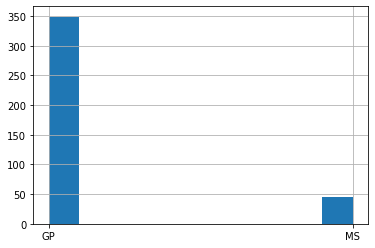

In [7]:
show_info(students, 'school')

1. *Не имеет пропусков*
2. *Большинство учеников (88%) из школы GP*
3. *Чисто информативная колонка, отфильтровать не получится*

#### SEX

Вывод значений:


F    208
M    187
Name: sex, dtype: int64

Вывод процентного соотношения:


F    0.526582
M    0.473418
Name: sex, dtype: float64

Вывод общей информации:


,sex
F,208
M,187


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB

График:


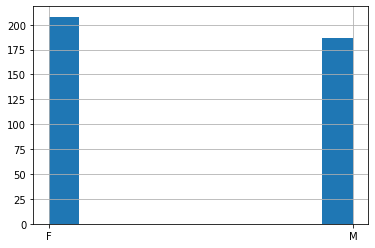

In [8]:
show_info(students, 'sex')

1. *Не имеет пропусков*
2. *Мужчин чуть менее половины (47%)*
3. *Не фильтруем*

#### AGE

Вывод значений:


16    104
17     98
15     82
18     82
19     24
20      3
21      1
22      1
Name: age, dtype: int64

Вывод процентного соотношения:


16    0.263291
17    0.248101
15    0.207595
18    0.207595
19    0.060759
20    0.007595
21    0.002532
22    0.002532
Name: age, dtype: float64

Вывод общей информации:


,age
16,104
17,98
15,82
18,82
19,24
20,3
21,1
22,1


Уникальных значений: 8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     395 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB

Первичная статистика (квартили, границы):
Среднее значение: 16.696202531645568
 25-й перцентиль: 16.0
 50-й перцентиль: 17.0
 75-й перцентиль: 18.0
 IQR: 2.0
 Границы выбросов: [13.0, 21.0]


График:


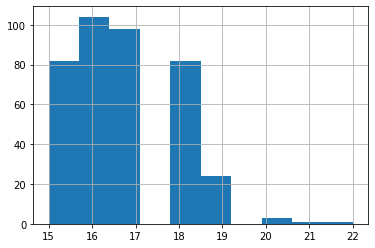

In [9]:
show_info(students, 'age')

*По результатам видно, что есть выброс. Выброс один, на общую статистику влияния не окажет, поэтому можно его удалить*

In [10]:
students = students[students.age <= 21]

#### ADDRESS

Вывод значений:


U    311
R     83
Name: address, dtype: int64

Вывод процентного соотношения:


U    0.78934
R    0.21066
Name: address, dtype: float64

Вывод общей информации:


,address
U,311
R,83


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  394 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB

График:


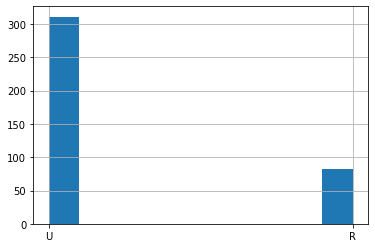

In [11]:
show_info(students, 'address')

*Не удивительно, что большинство учащихся живут в городе*

#### FAMSIZE

Вывод значений:


GT3    287
LE3    107
Name: famsize, dtype: int64

Вывод процентного соотношения:


GT3    0.728426
LE3    0.271574
Name: famsize, dtype: float64

Вывод общей информации:


,famsize
GT3,287
LE3,107


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  394 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB

График:


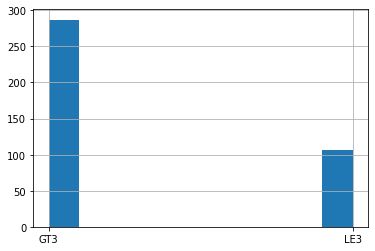

In [12]:
show_info(students, 'famsize')

*Большинство семей состоит из 4-ех человек и более*

#### PSTATUS

Вывод значений:


T    358
A     36
Name: pstatus, dtype: int64

Вывод процентного соотношения:


T    0.908629
A    0.091371
Name: pstatus, dtype: float64

Вывод общей информации:


,pstatus
T,358
A,36


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   pstatus  394 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB

График:


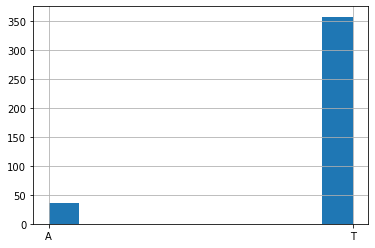

In [13]:
show_info(students, 'pstatus')

*Преобладает значение T*

#### MEDU

Вывод значений:


4.0    131
2.0    102
3.0     99
1.0     59
0.0      3
Name: medu, dtype: int64

Вывод процентного соотношения:


4.0    0.332487
2.0    0.258883
3.0    0.251269
1.0    0.149746
0.0    0.007614
Name: medu, dtype: float64

Вывод общей информации:


,medu
4.0,131
2.0,102
3.0,99
1.0,59
0.0,3


Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   medu    394 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB

Первичная статистика (квартили, границы):
Среднее значение: 2.751269035532995
 25-й перцентиль: 2.0
 50-й перцентиль: 3.0
 75-й перцентиль: 4.0
 IQR: 2.0
 Границы выбросов: [-1.0, 7.0]


График:


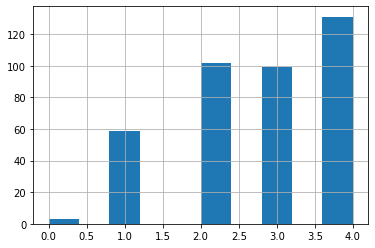

In [14]:
show_info(students, 'medu')

1. *Выбросов нет*
2. *Большинство значений - 4. Значит матерей с высшим образованием больше всех. Интересно, влияет ли этот параметр на успеваемость ребенка? (Проверим позже)*

#### FEDU

Вывод значений:


2.0     130
3.0      96
4.0      88
1.0      77
0.0       2
40.0      1
Name: fedu, dtype: int64

Вывод процентного соотношения:


2.0     0.329949
3.0     0.243655
4.0     0.223350
1.0     0.195431
0.0     0.005076
40.0    0.002538
Name: fedu, dtype: float64

Вывод общей информации:


,fedu
2.0,130
3.0,96
4.0,88
1.0,77
0.0,2
40.0,1


Уникальных значений: 6
<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fedu    394 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB

Первичная статистика (квартили, границы):
Среднее значение: 2.581218274111675
 25-й перцентиль: 2.0
 50-й перцентиль: 2.0
 75-й перцентиль: 3.0
 IQR: 1.0
 Границы выбросов: [0.5, 4.5]


График:


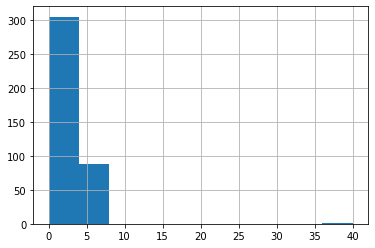

In [15]:
show_info(students, 'fedu')

1. Имеет выбросы.
    * По условию значения должны быть от 0 до 4, но есть одно значение 40. Скорее всего здесь ошибка, имелось ввиду значение 4.
    * Есть значение 0. Но по условию данное значение допустимо, сперва заменим выброс 40, потом перепроверим данные. 
2. Здесь мы наблюдаем иную картину. Большинство отцов имеют образование в 5-9 классов. Посмотрим потом, как это будет влиять на успеваемость ребенка

Вывод значений:


2.0    130
3.0     96
4.0     89
1.0     77
0.0      2
Name: fedu, dtype: int64

Вывод процентного соотношения:


2.0    0.329949
3.0    0.243655
4.0    0.225888
1.0    0.195431
0.0    0.005076
Name: fedu, dtype: float64

Вывод общей информации:


,fedu
2.0,130
3.0,96
4.0,89
1.0,77
0.0,2


Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fedu    394 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB

Первичная статистика (квартили, границы):
Среднее значение: 2.489847715736041
 25-й перцентиль: 2.0
 50-й перцентиль: 2.0
 75-й перцентиль: 3.0
 IQR: 1.0
 Границы выбросов: [0.5, 4.5]


График:


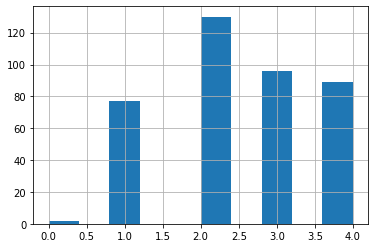

In [16]:
students.fedu = students.fedu.apply(lambda x: 4 if x == 40 else x)
stud_original.fedu = stud_original.fedu.apply(lambda x: 4 if x == 40 else x)

# А теперь проверим, как данные поменялись
show_info(students, 'fedu')

*По прежнему значения 0 - выбросы. Их 2. Столько малое количество выбросов не должно повлиять на общую картину, поэтому если мы от них избавимся, то это не должно повлиять на общую картину*

In [17]:
students = students[students.fedu > 0]

#### MJOB

Вывод значений:


other       151
services     97
at_home      58
teacher      54
health       32
Name: mjob, dtype: int64

Вывод процентного соотношения:


other       0.385204
services    0.247449
at_home     0.147959
teacher     0.137755
health      0.081633
Name: mjob, dtype: float64

Вывод общей информации:


,mjob
other,151
services,97
at_home,58
teacher,54
health,32


Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mjob    392 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB

График:


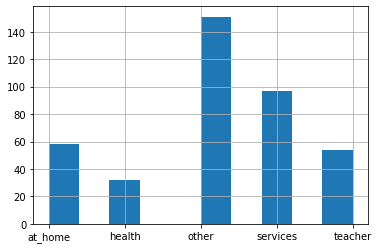

In [18]:
show_info(students, 'mjob')

*Преобладает значение Other*

#### FJOB

Вывод значений:


other       231
services    101
teacher      29
at_home      16
health       15
Name: fjob, dtype: int64

Вывод процентного соотношения:


other       0.589286
services    0.257653
teacher     0.073980
at_home     0.040816
health      0.038265
Name: fjob, dtype: float64

Вывод общей информации:


,fjob
other,231
services,101
teacher,29
at_home,16
health,15


Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   fjob    392 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB

График:


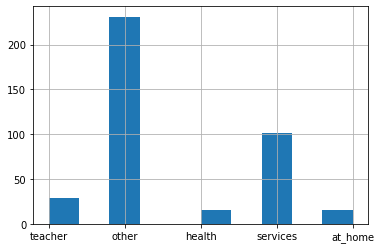

In [19]:
show_info(students, 'fjob')

*Аналогично предыдущей колонке - преобладает Other*

#### REASON

Вывод значений:


course        153
home          104
reputation    102
other          33
Name: reason, dtype: int64

Вывод процентного соотношения:


course        0.390306
home          0.265306
reputation    0.260204
other         0.084184
Name: reason, dtype: float64

Вывод общей информации:


,reason
course,153
home,104
reputation,102
other,33


Уникальных значений: 4
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  392 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB

График:


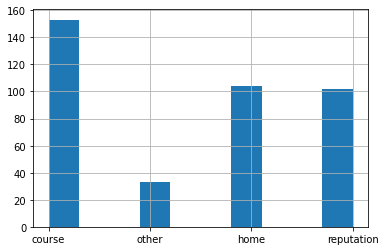

In [20]:
show_info(students, 'reason')

*Преобладает значение course*

#### GUARDIAN

Вывод значений:


mother    278
father     86
other      28
Name: guardian, dtype: int64

Вывод процентного соотношения:


mother    0.709184
father    0.219388
other     0.071429
Name: guardian, dtype: float64

Вывод общей информации:


,guardian
mother,278
father,86
other,28


Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  392 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB

График:


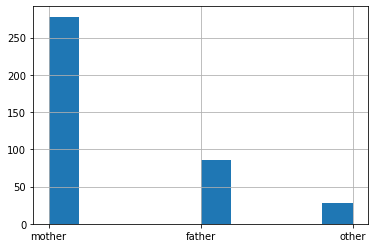

In [21]:
show_info(students, 'guardian')

*Преобладает значение mother*

#### TRAVELTIME

Вывод значений:


1.0    269
2.0     94
3.0     22
4.0      7
Name: traveltime, dtype: int64

Вывод процентного соотношения:


1.0    0.686224
2.0    0.239796
3.0    0.056122
4.0    0.017857
Name: traveltime, dtype: float64

Вывод общей информации:


,traveltime
1.0,269
2.0,94
3.0,22
4.0,7


Уникальных значений: 4
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  392 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB

Первичная статистика (квартили, границы):
Среднее значение: 1.405612244897959
 25-й перцентиль: 1.0
 50-й перцентиль: 1.0
 75-й перцентиль: 2.0
 IQR: 1.0
 Границы выбросов: [-0.5, 3.5]


График:


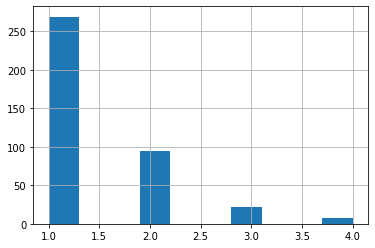

In [22]:
show_info(students, 'traveltime')

1. *Сильно преобладает значение 1*
2. *Есть выбросы, их 7 (что составляет менее 2%)*

#### STUDYTIME

Вывод значений:


2.0    200
1.0    102
3.0     64
4.0     26
Name: studytime, dtype: int64

Вывод процентного соотношения:


2.0    0.510204
1.0    0.260204
3.0    0.163265
4.0    0.066327
Name: studytime, dtype: float64

Вывод общей информации:


,studytime
2.0,200
1.0,102
3.0,64
4.0,26


Уникальных значений: 4
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  392 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB

Первичная статистика (квартили, границы):
Среднее значение: 2.0357142857142856
 25-й перцентиль: 1.0
 50-й перцентиль: 2.0
 75-й перцентиль: 2.0
 IQR: 1.0
 Границы выбросов: [-0.5, 3.5]


График:


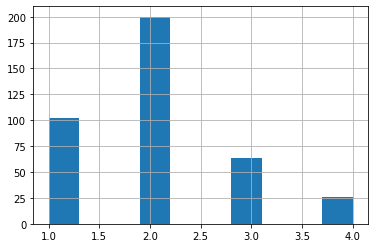

In [23]:
show_info(students, 'studytime')

1. *Преобладает значение 2*
2. *Есть выбросы, их много. Могут повлиять на статистику, оставим*

#### FAILURES

Вывод значений:


0.0    313
1.0     49
2.0     16
3.0     14
Name: failures, dtype: int64

Вывод процентного соотношения:


0.0    0.798469
1.0    0.125000
2.0    0.040816
3.0    0.035714
Name: failures, dtype: float64

Вывод общей информации:


,failures
0.0,313
1.0,49
2.0,16
3.0,14


Уникальных значений: 4
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  392 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB

Первичная статистика (квартили, границы):
Среднее значение: 0.3137755102040816
 25-й перцентиль: 0.0
 50-й перцентиль: 0.0
 75-й перцентиль: 0.0
 IQR: 0.0
 Границы выбросов: [0.0, 0.0]


График:


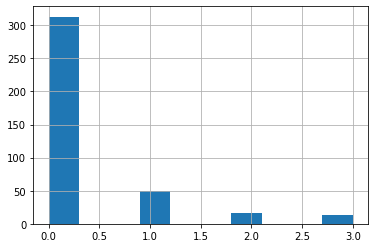

In [24]:
# почему-то функция замены пустых не отработала на данной колонке. Заменим сами
students.failures.fillna(0, inplace = True)

show_info(students, 'failures')

1. *Распределение напоминает параболу*
2. *Сильно преобладает 0 (почти 80%)*
3. Отсюда нижняя и верхняя граница - 0. Получается, что остальные значения - выбросы. Но мы понимаем, что эти выбросы могут содержать статистически важные данные, и удалять/преобразовывать их нельзя

#### SCHOOLSUP

Вывод значений:


no     341
yes     51
Name: schoolsup, dtype: int64

Вывод процентного соотношения:


no     0.869898
yes    0.130102
Name: schoolsup, dtype: float64

Вывод общей информации:


,schoolsup
no,341
yes,51


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  392 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB

График:


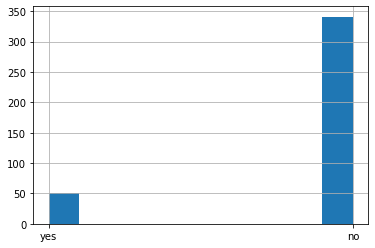

In [25]:
show_info(students, 'schoolsup')

*Преобладает NO*


#### FAMSUP

Вывод значений:


yes    257
no     135
Name: famsup, dtype: int64

Вывод процентного соотношения:


yes    0.655612
no     0.344388
Name: famsup, dtype: float64

Вывод общей информации:


,famsup
yes,257
no,135


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  392 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB

График:


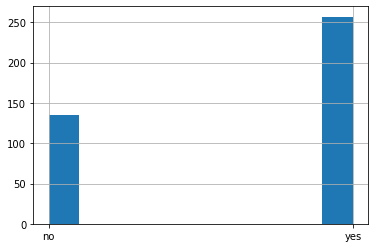

In [26]:
show_info(students, 'famsup')

*Преобладает значение yes*

#### PAID

Вывод значений:


no     238
yes    154
Name: paid, dtype: int64

Вывод процентного соотношения:


no     0.607143
yes    0.392857
Name: paid, dtype: float64

Вывод общей информации:


,paid
no,238
yes,154


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    392 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB

График:


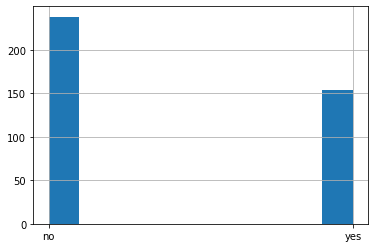

In [27]:
show_info(students, 'paid')

*Преобладает no, но не сильно*

#### ACTIVITIES

Вывод значений:


yes    207
no     185
Name: activities, dtype: int64

Вывод процентного соотношения:


yes    0.528061
no     0.471939
Name: activities, dtype: float64

Вывод общей информации:


,activities
yes,207
no,185


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  392 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB

График:


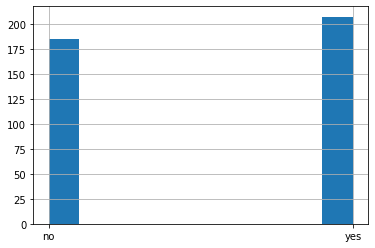

In [28]:
show_info(students, 'activities')

*Преобладает yes, разница не велика*

#### NURSERY

Вывод значений:


yes    314
no      78
Name: nursery, dtype: int64

Вывод процентного соотношения:


yes    0.80102
no     0.19898
Name: nursery, dtype: float64

Вывод общей информации:


,nursery
yes,314
no,78


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  392 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB

График:


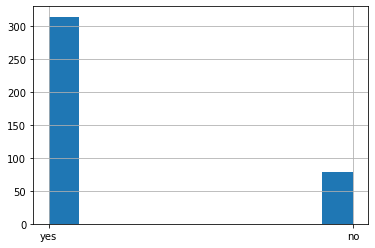

In [29]:
show_info(students, 'nursery')

*Преобладает yes*

#### HIGHER

Вывод значений:


yes    374
no      18
Name: higher, dtype: int64

Вывод процентного соотношения:


yes    0.954082
no     0.045918
Name: higher, dtype: float64

Вывод общей информации:


,higher
yes,374
no,18


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  392 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB

График:


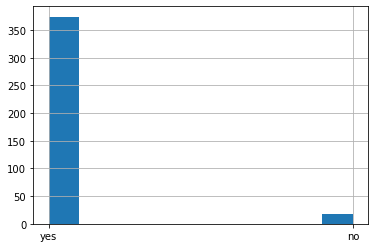

In [30]:
show_info(students, 'higher')

*Преобладает YES*

#### INTERNET

Вывод значений:


yes    336
no      56
Name: internet, dtype: int64

Вывод процентного соотношения:


yes    0.857143
no     0.142857
Name: internet, dtype: float64

Вывод общей информации:


,internet
yes,336
no,56


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  392 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB

График:


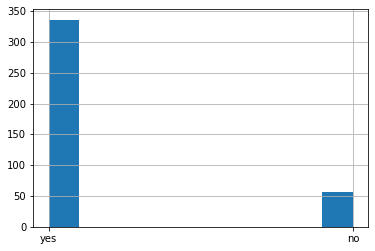

In [31]:
show_info(students, 'internet')

*Преобладает YES*

#### ROMANTIC

Вывод значений:


no     270
yes    122
Name: romantic, dtype: int64

Вывод процентного соотношения:


no     0.688776
yes    0.311224
Name: romantic, dtype: float64

Вывод общей информации:


,romantic
no,270
yes,122


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  392 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB

График:


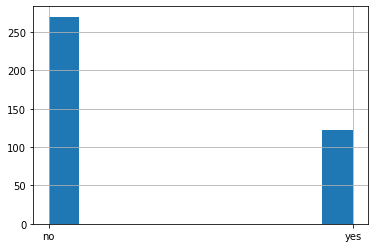

In [32]:
show_info(students, 'romantic')

*Преобладает YES*

#### FAMREL

Вывод значений:


 4.0    208
 5.0     98
 3.0     61
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

Вывод процентного соотношения:


 4.0    0.530612
 5.0    0.250000
 3.0    0.155612
 2.0    0.043367
 1.0    0.017857
-1.0    0.002551
Name: famrel, dtype: float64

Вывод общей информации:


,famrel
4.0,208
5.0,98
3.0,61
2.0,17
1.0,7
-1.0,1


Уникальных значений: 6
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  392 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB

Первичная статистика (квартили, границы):
Среднее значение: 3.941326530612245
 25-й перцентиль: 4.0
 50-й перцентиль: 4.0
 75-й перцентиль: 4.25
 IQR: 0.25
 Границы выбросов: [3.625, 4.625]


График:


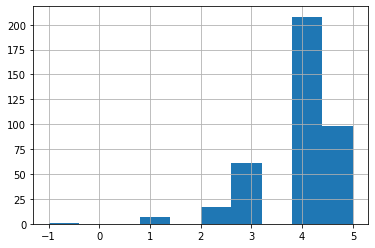

In [33]:
show_info(students, 'famrel')

1. *Преобладает 4*
2. *Есть выбросы, но подходят под условие. Посмотрим, что нам покажет анализ. Оставим*
3. *Здравый смысл подсказывает, что значение -1 - явная ошибка. Похоже что должно быть 1, заменим*
4. Распределение напоминает гиперболу (по модулю с наибольшим значением в точке 4)

Вывод значений:


4.0    208
5.0     98
3.0     61
2.0     17
1.0      8
Name: famrel, dtype: int64

Вывод процентного соотношения:


4.0    0.530612
5.0    0.250000
3.0    0.155612
2.0    0.043367
1.0    0.020408
Name: famrel, dtype: float64

Вывод общей информации:


,famrel
4.0,208
5.0,98
3.0,61
2.0,17
1.0,8


Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  392 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB

Первичная статистика (квартили, границы):
Среднее значение: 3.9464285714285716
 25-й перцентиль: 4.0
 50-й перцентиль: 4.0
 75-й перцентиль: 4.25
 IQR: 0.25
 Границы выбросов: [3.625, 4.625]


График:


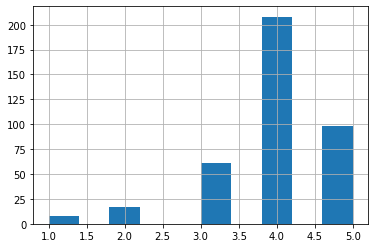

In [34]:
students.famrel = students.famrel.apply(lambda x: 1 if x == -1 else x)
stud_original.famrel = stud_original.famrel.apply(lambda x: 1 if x == -1 else x)

show_info(students, 'famrel')

In [35]:
students.famrel.describe()

count    392.000000
mean       3.946429
std        0.872828
min        1.000000
25%        4.000000
50%        4.000000
75%        4.250000
max        5.000000
Name: famrel, dtype: float64

*Интересно получается, что теперь по границам выбросов у нас возможно одно единственное число - 4, остальное выбросы. Явно менять/удалять данные не надо. Проанализируем потом*

#### FREETIME

Вывод значений:


3.0    163
4.0    110
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64

Вывод процентного соотношения:


3.0    0.415816
4.0    0.280612
2.0    0.160714
5.0    0.096939
1.0    0.045918
Name: freetime, dtype: float64

Вывод общей информации:


,freetime
3.0,163
4.0,110
2.0,63
5.0,38
1.0,18


Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   freetime  392 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB

Первичная статистика (квартили, границы):
Среднее значение: 3.2219387755102042
 25-й перцентиль: 3.0
 50-й перцентиль: 3.0
 75-й перцентиль: 4.0
 IQR: 1.0
 Границы выбросов: [1.5, 5.5]


График:


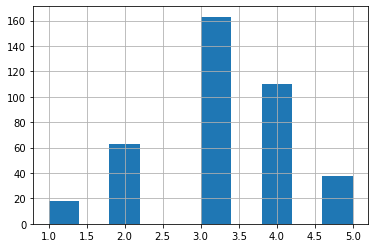

In [36]:
show_info(students, 'freetime')

1. *Преобладает 3*
2. *Есть выбросы. Но они могут показатсья статистически интересными, оставим*

#### GOOUT

Вывод значений:


3.0    134
2.0    100
4.0     84
5.0     51
1.0     23
Name: goout, dtype: int64

Вывод процентного соотношения:


3.0    0.341837
2.0    0.255102
4.0    0.214286
5.0    0.130102
1.0    0.058673
Name: goout, dtype: float64

Вывод общей информации:


,goout
3.0,134
2.0,100
4.0,84
5.0,51
1.0,23


Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   goout   392 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB

Первичная статистика (квартили, границы):
Среднее значение: 3.1020408163265305
 25-й перцентиль: 2.0
 50-й перцентиль: 3.0
 75-й перцентиль: 4.0
 IQR: 2.0
 Границы выбросов: [-1.0, 7.0]


График:


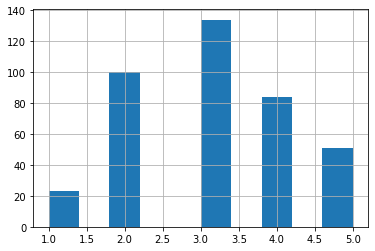

In [37]:
show_info(students, 'goout')

1. *преобладает 3*
2. *выбросов нет*

#### HEALTH

Вывод значений:


5.0    138
3.0     88
4.0     78
1.0     45
2.0     43
Name: health, dtype: int64

Вывод процентного соотношения:


5.0    0.352041
3.0    0.224490
4.0    0.198980
1.0    0.114796
2.0    0.109694
Name: health, dtype: float64

Вывод общей информации:


,health
5.0,138
3.0,88
4.0,78
1.0,45
2.0,43


Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  392 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB

Первичная статистика (квартили, границы):
Среднее значение: 3.563775510204082
 25-й перцентиль: 3.0
 50-й перцентиль: 4.0
 75-й перцентиль: 5.0
 IQR: 2.0
 Границы выбросов: [0.0, 8.0]


График:


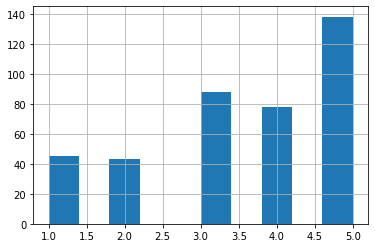

In [38]:
show_info(students, 'health')

1. *преобладает 5*
2. *выбросов нет*

#### ABSENSES

Вывод значений:


0.0      111
4.0       65
2.0       59
6.0       31
8.0       20
10.0      17
14.0      12
12.0      12
3.0        8
7.0        6
16.0       6
18.0       5
5.0        5
20.0       4
9.0        3
22.0       3
1.0        3
13.0       2
15.0       2
11.0       2
40.0       1
38.0       1
56.0       1
23.0       1
24.0       1
25.0       1
385.0      1
17.0       1
75.0       1
21.0       1
212.0      1
28.0       1
19.0       1
26.0       1
30.0       1
54.0       1
Name: absences, dtype: int64

Вывод процентного соотношения:


0.0      0.283163
4.0      0.165816
2.0      0.150510
6.0      0.079082
8.0      0.051020
10.0     0.043367
14.0     0.030612
12.0     0.030612
3.0      0.020408
7.0      0.015306
16.0     0.015306
18.0     0.012755
5.0      0.012755
20.0     0.010204
9.0      0.007653
22.0     0.007653
1.0      0.007653
13.0     0.005102
15.0     0.005102
11.0     0.005102
40.0     0.002551
38.0     0.002551
56.0     0.002551
23.0     0.002551
24.0     0.002551
25.0     0.002551
385.0    0.002551
17.0     0.002551
75.0     0.002551
21.0     0.002551
212.0    0.002551
28.0     0.002551
19.0     0.002551
26.0     0.002551
30.0     0.002551
54.0     0.002551
Name: absences, dtype: float64

Вывод общей информации:


,absences
0.0,111
4.0,65
2.0,59
6.0,31
8.0,20
10.0,17
14.0,12
12.0,12
3.0,8
7.0,6


Уникальных значений: 36
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  392 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB

Первичная статистика (квартили, границы):
Среднее значение: 7.168367346938775
 25-й перцентиль: 0.0
 50-й перцентиль: 4.0
 75-й перцентиль: 8.0
 IQR: 8.0
 Границы выбросов: [-12.0, 20.0]


График:


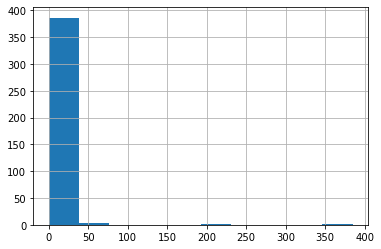

In [39]:
show_info(students, 'absences')

*Есть 2 строки, содержащие явные ошибки - значения 385 и 212. сперва отредактируем эти строки
Узнаем, сколько строк - выбросы*

In [40]:
students.absences = students.absences.apply(lambda x: 0 if x > 100 else x)
stud_original.absences = stud_original.absences.apply(lambda x: None if x > 100 else x)

students[students.absences > 20].absences.count()

15

*оставим, т.к. значения похожи на допустимые. Что с ними делать, пока не ясно*

#### SCORE
А вот и наша главная колонка. Именно она нам для статистики и интересна.

Вывод значений:


50.0     53
55.0     52
0.0      37
75.0     33
65.0     31
60.0     31
40.0     30
45.0     27
70.0     27
80.0     15
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
20.0      1
100.0     1
Name: score, dtype: int64

Вывод процентного соотношения:


50.0     0.135204
55.0     0.132653
0.0      0.094388
75.0     0.084184
65.0     0.079082
60.0     0.079082
40.0     0.076531
45.0     0.068878
70.0     0.068878
80.0     0.038265
30.0     0.038265
90.0     0.030612
35.0     0.022959
25.0     0.017857
85.0     0.015306
95.0     0.012755
20.0     0.002551
100.0    0.002551
Name: score, dtype: float64

Вывод общей информации:


,score
50.0,53
55.0,52
0.0,37
75.0,33
65.0,31
60.0,31
40.0,30
45.0,27
70.0,27
80.0,15


Уникальных значений: 18
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   392 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB

Первичная статистика (квартили, границы):
Среднее значение: 52.27040816326531
 25-й перцентиль: 40.0
 50-й перцентиль: 55.0
 75-й перцентиль: 70.0
 IQR: 30.0
 Границы выбросов: [-5.0, 115.0]


График:


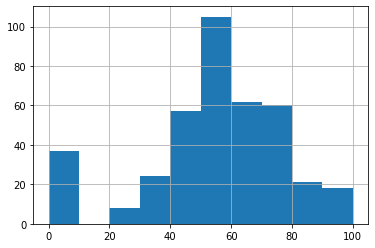

In [41]:
show_info(students, 'score')

1. *самое частое - 50*
2. *есть нулевые значения. Нужно быть сверхразумом, чтобы заработать 0 баллов. Из графика видно, что эти данные выбиваются из обей картины, уберем*
3. *пустые значения нам точно не нужны, так как они не дают нам никаких результатов исследования. От них избавимся. Не забудем избавиться от этих строк и во втором датасете*

In [42]:
students = students[students.score > 0]
stud_original = stud_original[stud_original.score > 0]

Вывод значений:


50.0     53
55.0     52
75.0     33
60.0     31
65.0     31
40.0     30
70.0     27
45.0     27
30.0     15
80.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

Вывод процентного соотношения:


50.0     0.149296
55.0     0.146479
75.0     0.092958
60.0     0.087324
65.0     0.087324
40.0     0.084507
70.0     0.076056
45.0     0.076056
30.0     0.042254
80.0     0.042254
90.0     0.033803
35.0     0.025352
25.0     0.019718
85.0     0.016901
95.0     0.014085
100.0    0.002817
20.0     0.002817
Name: score, dtype: float64

Вывод общей информации:


,score
50.0,53
55.0,52
75.0,33
60.0,31
65.0,31
40.0,30
70.0,27
45.0,27
30.0,15
80.0,15


Уникальных значений: 17
<class 'pandas.core.frame.DataFrame'>
Int64Index: 355 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   355 non-null    float64
dtypes: float64(1)
memory usage: 5.5 KB

Первичная статистика (квартили, границы):
Среднее значение: 57.71830985915493
 25-й перцентиль: 47.5
 50-й перцентиль: 55.0
 75-й перцентиль: 70.0
 IQR: 22.5
 Границы выбросов: [13.75, 103.75]


График:


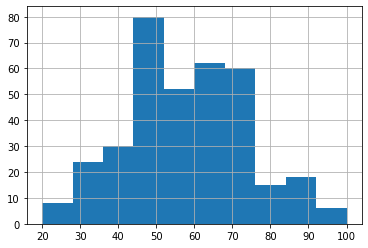

In [43]:
show_info(students, 'score')

---

# Корреляционный анализ

Так как я захотел рассмотреть 2 датасета (с пустыми значениями и замененными), то проведу 2 анализа и сравню результаты

### *Оригинальный датасет*

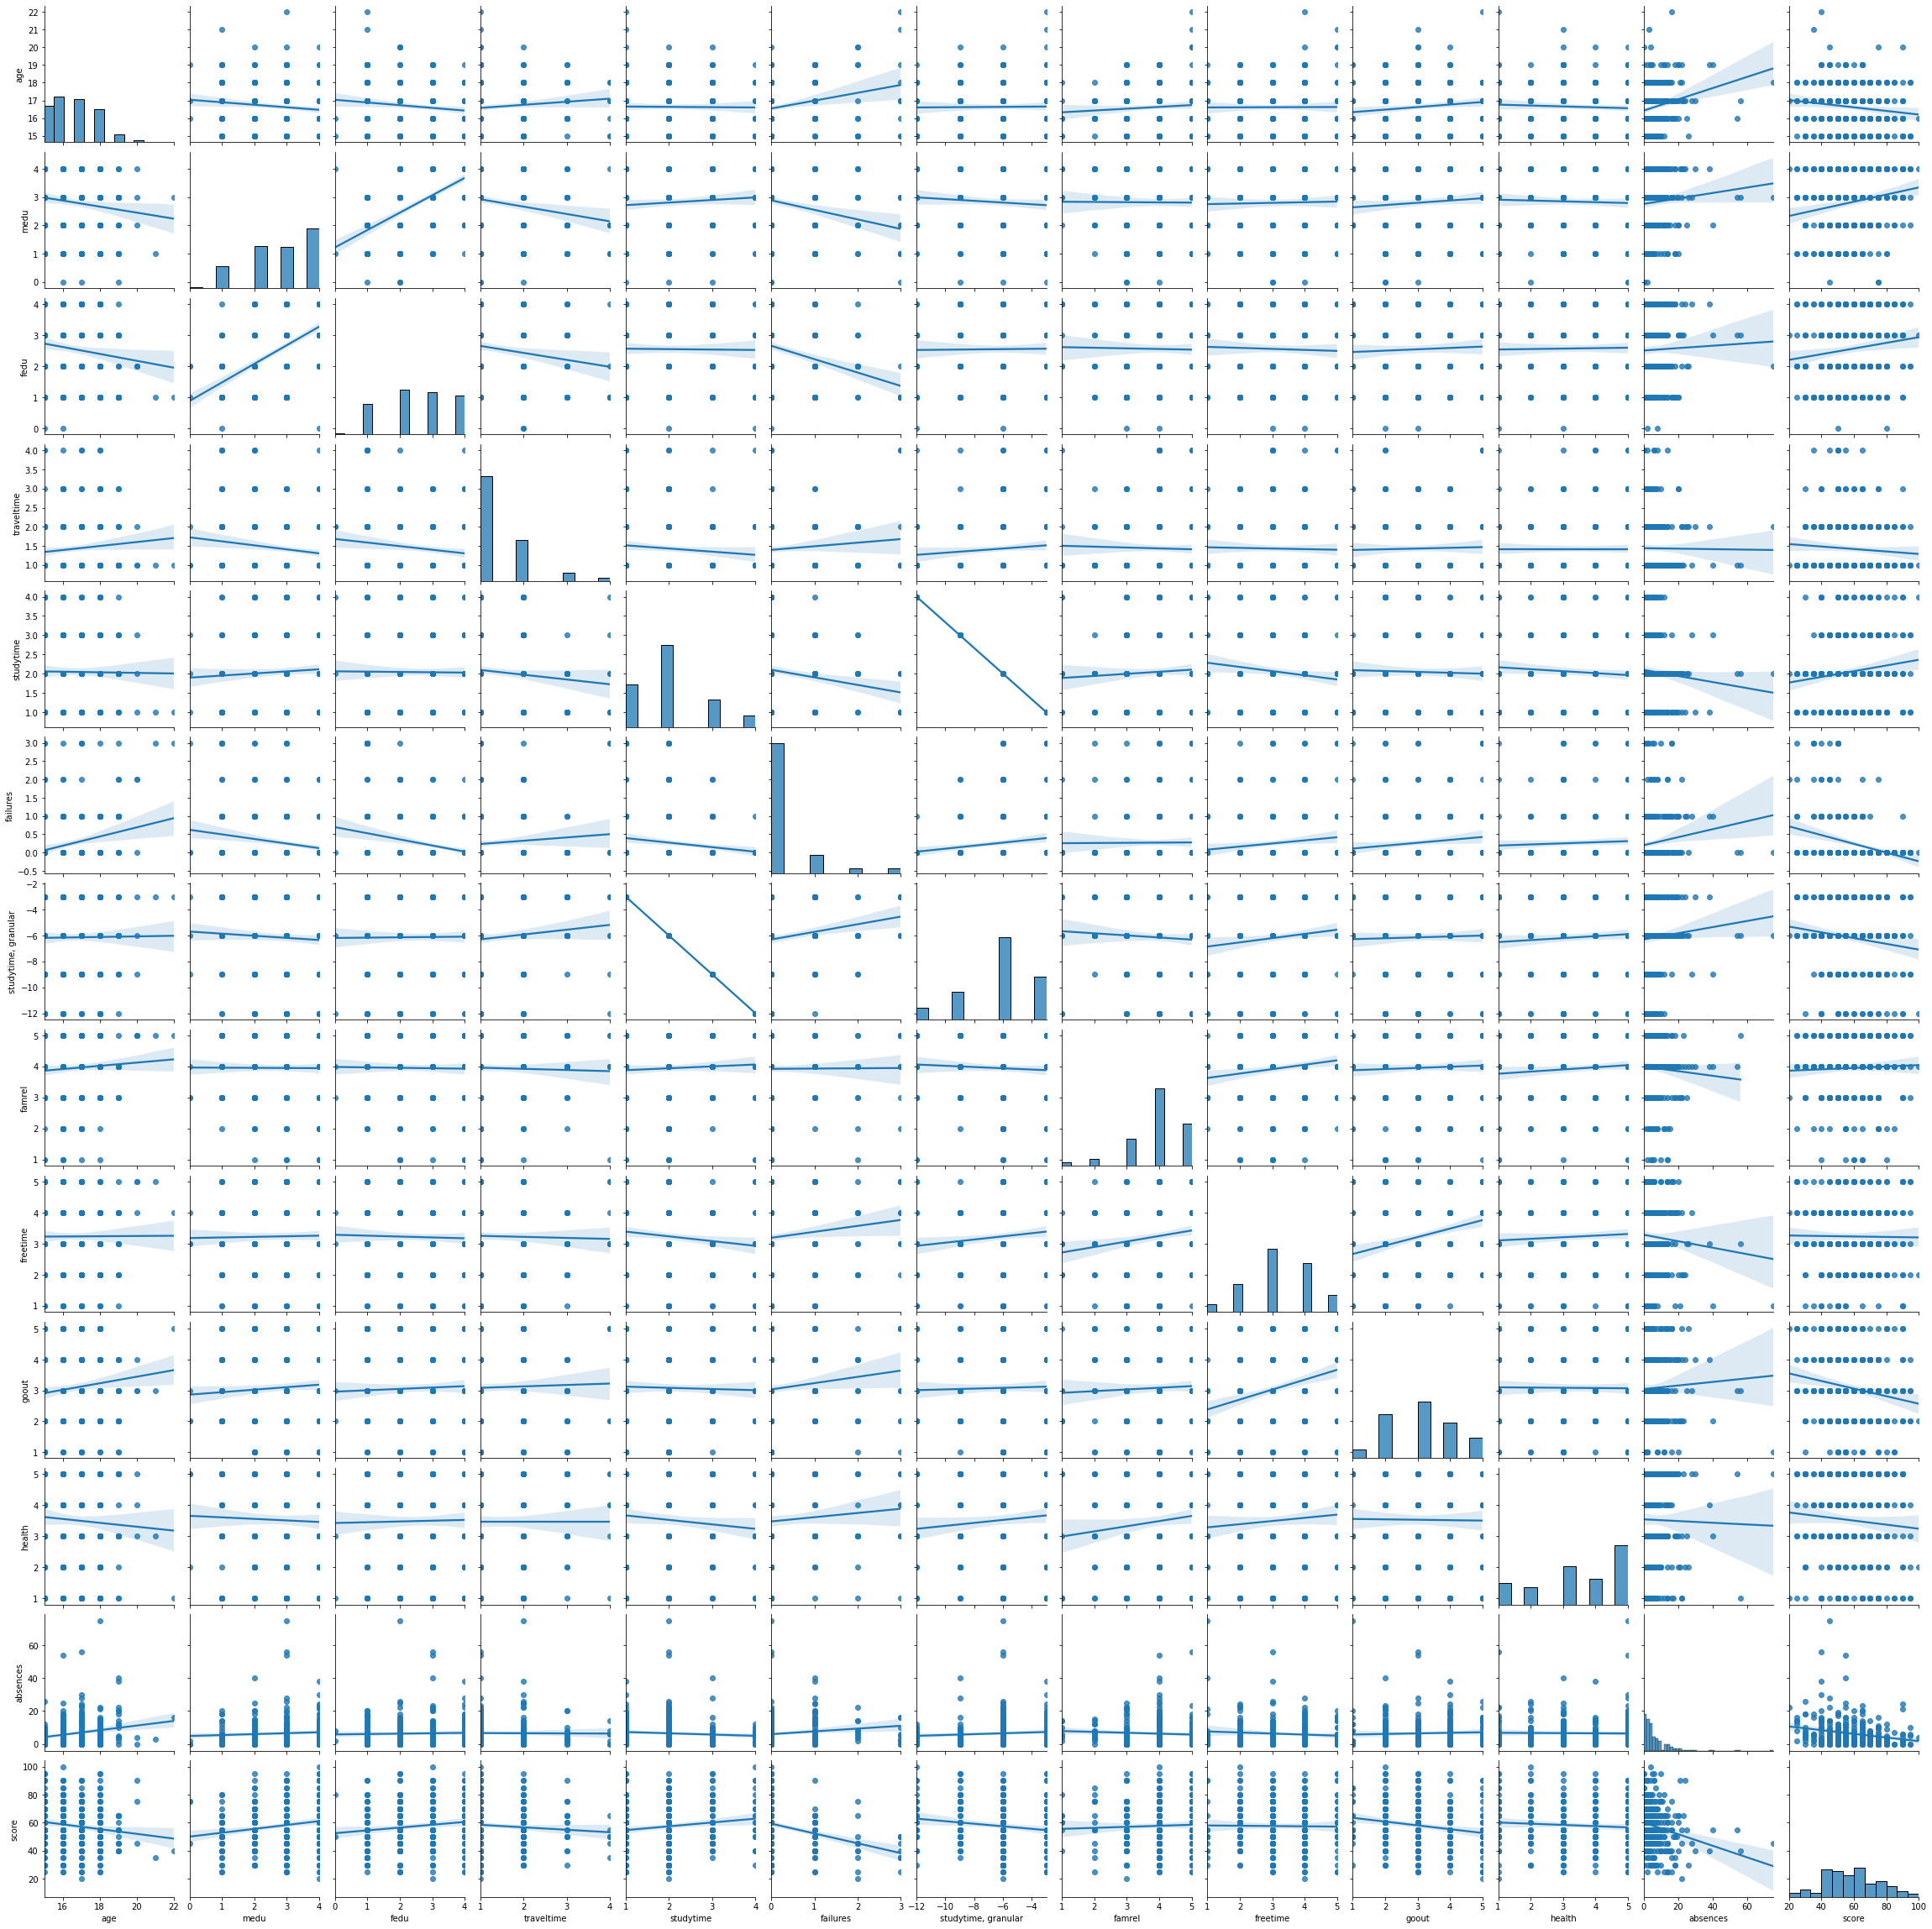

In [44]:
sns.pairplot(stud_original, kind = 'reg')

In [45]:
stud_original.corr()

,age,medu,fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.122979,-0.130010,0.095370,-0.011426,0.235875,0.011426,0.072918,0.004837,0.123638,-0.056173,0.211007,-0.131542
medu,-0.122979,1.000000,0.606270,-0.165394,0.070533,-0.205944,-0.070533,-0.006133,0.021002,0.080556,-0.038050,0.073974,0.186477
fedu,-0.130010,0.606270,1.000000,-0.145471,-0.010779,-0.268901,0.010779,-0.016694,-0.030449,0.044127,0.018671,0.029999,0.135268
traveltime,0.095370,-0.165394,-0.145471,1.000000,-0.101490,0.091757,0.101490,-0.029299,-0.023067,0.029374,-0.000092,-0.007783,-0.075516
studytime,-0.011426,0.070533,-0.010779,-0.101490,1.000000,-0.156406,-1.000000,0.057143,-0.128661,-0.029686,-0.085469,-0.078282,0.142055
failures,0.235875,-0.205944,-0.268901,0.091757,-0.156406,1.000000,0.156406,0.006870,0.127391,0.126770,0.064083,0.136301,-0.289377
"studytime, granular",0.011426,-0.070533,0.010779,0.101490,-1.000000,0.156406,1.000000,-0.057143,0.128661,0.029686,0.085469,0.078282,-0.142055
famrel,0.072918,-0.006133,-0.016694,-0.029299,0.057143,0.006870,-0.057143,1.000000,0.158597,0.045341,0.107055,-0.063147,0.040590
freetime,0.004837,0.021002,-0.030449,-0.023067,-0.128661,0.127391,0.128661,0.158597,1.000000,0.296392,0.072729,-0.081612,-0.012457
goout,0.123638,0.080556,0.044127,0.029374,-0.029686,0.126770,0.029686,0.045341,0.296392,1.000000,-0.010343,0.044601,-0.182286


### *Датасет с заменами*

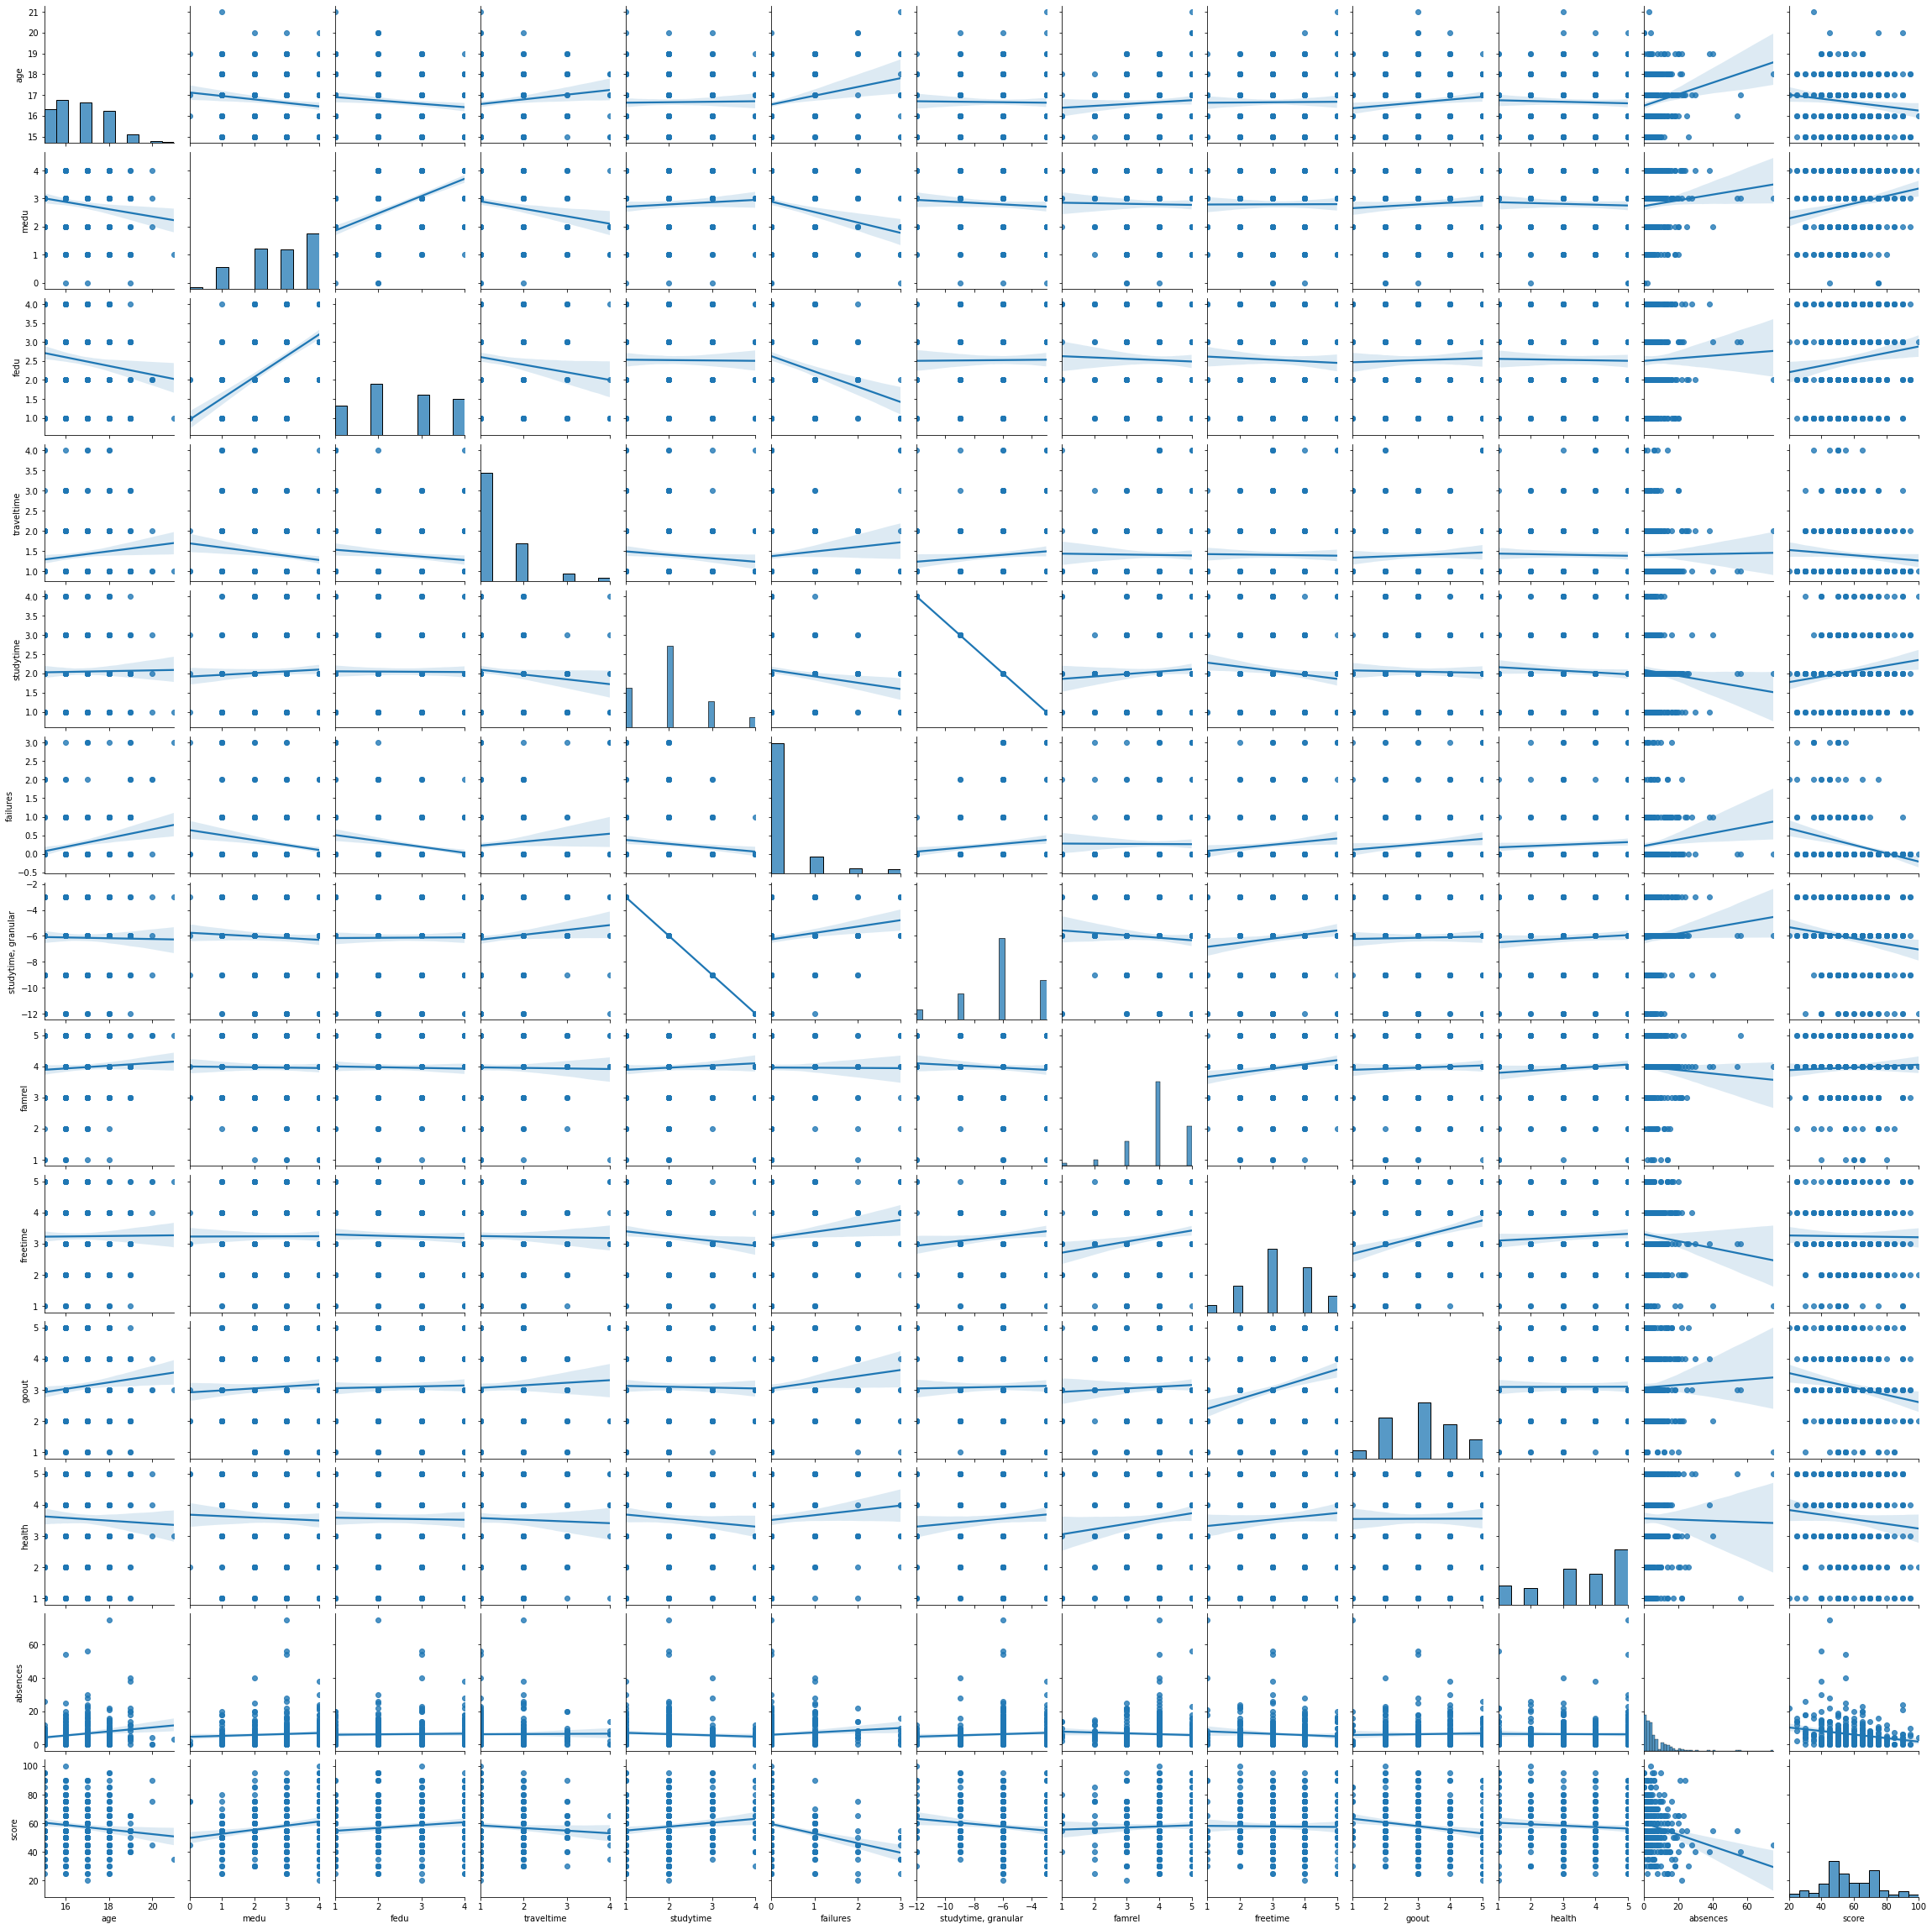

In [46]:
sns.pairplot(students, kind = 'reg')

In [47]:
students.corr()

,age,medu,fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.147318,-0.135787,0.124082,0.015509,0.224053,-0.015509,0.062969,0.009164,0.120175,-0.040700,0.183597,-0.123302
medu,-0.147318,1.000000,0.588949,-0.166019,0.060706,-0.224104,-0.060706,-0.015281,0.002780,0.064675,-0.037047,0.076815,0.195491
fedu,-0.135787,0.588949,1.000000,-0.131345,-0.007856,-0.254783,0.007856,-0.028778,-0.039512,0.028077,-0.017129,0.027441,0.130692
traveltime,0.124082,-0.166019,-0.131345,1.000000,-0.103398,0.111053,0.103398,-0.014285,-0.014367,0.051230,-0.027060,0.009263,-0.077339
studytime,0.015509,0.060706,-0.007856,-0.103398,1.000000,-0.131818,-1.000000,0.066556,-0.127032,-0.020786,-0.077021,-0.076877,0.140458
failures,0.224053,-0.224104,-0.254783,0.111053,-0.131818,1.000000,0.131818,-0.005349,0.126651,0.119893,0.073977,0.109301,-0.273982
"studytime, granular",-0.015509,-0.060706,0.007856,0.103398,-1.000000,0.131818,1.000000,-0.066556,0.127032,0.020786,0.077021,0.076877,-0.140458
famrel,0.062969,-0.015281,-0.028778,-0.014285,0.066556,-0.005349,-0.066556,1.000000,0.153562,0.043870,0.105634,-0.054155,0.040000
freetime,0.009164,0.002780,-0.039512,-0.014367,-0.127032,0.126651,0.127032,0.153562,1.000000,0.289715,0.074757,-0.091790,-0.011615
goout,0.120175,0.064675,0.028077,0.051230,-0.020786,0.119893,0.020786,0.043870,0.289715,1.000000,0.002336,0.032843,-0.173068


### *Первичные выводы по корреляционному анализу:*
1. В датасете есть 2 колонки с сильнокоррелирующими данными - *studytime* и *studytime, granular*. Учитывая то, что у нас нет информации, какая информация хранится в колонке **studytime, granular**, то мы спокойно можем от нее избавиться
2. Корреляционный анализ двух датасетов показал примерно одинаковые данные, что говорит нам о том, что влияние замены данных было самым минимальным, а значит для более глубокого анализа нам подойдет любой из датасетов (но оригинальный всегда лучше, т.к. датасет с заменой данных все же имеет небольшую погрешность)
3. Мы видим следующие тенденции:
    * Все значения так или иначе влияют на успеваемость. Особенно сильно влияют - age, medu, fedu, studytime, failures, goout, absences
    * Все мои гипотезы так или иначе подтвердились
    * В положительную сторону влияют - medu, fedu, studytime, famrel. Остальные оказывают негативное влияние на успеваемость

In [48]:
students.drop(['studytime, granular'], inplace = True, axis = 1)
stud_original.drop(['studytime, granular'], inplace = True, axis = 1)

---

# Анализ номинативных данных

*Для этого нам понадобится список столбцов. Найдем его:*

In [49]:
list_obj_col = []
for column in students.columns:
    if students[column].dtypes in ['object', 'O']:
        list_obj_col.append(column)
display(list_obj_col)

['school',
 'sex',
 'address',
 'famsize',
 'pstatus',
 'mjob',
 'fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

### *Оригинальный датасет*

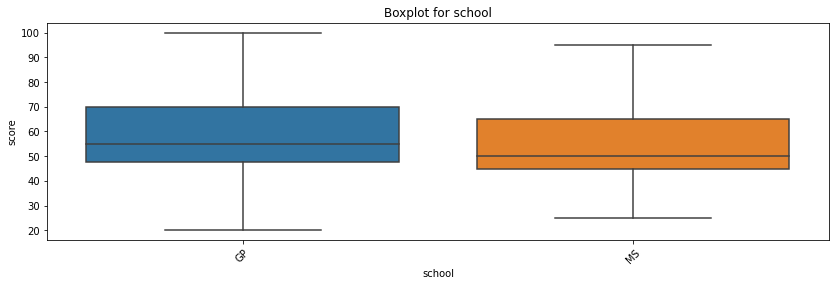

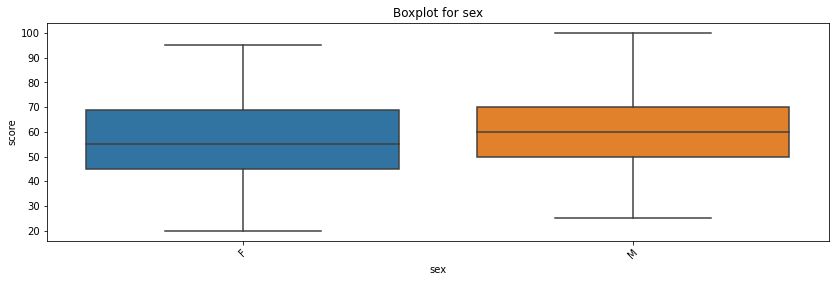

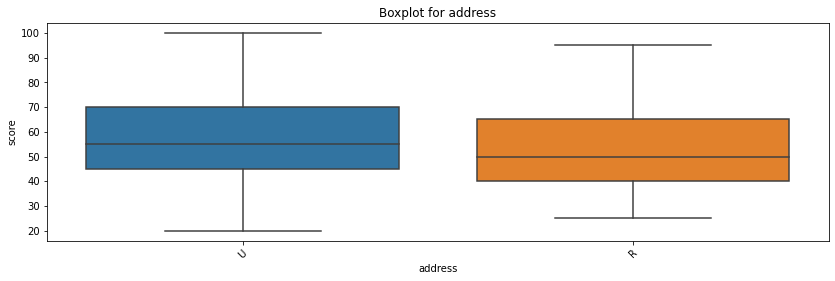

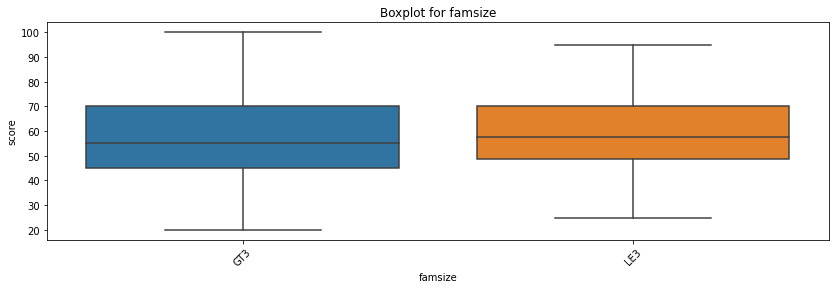

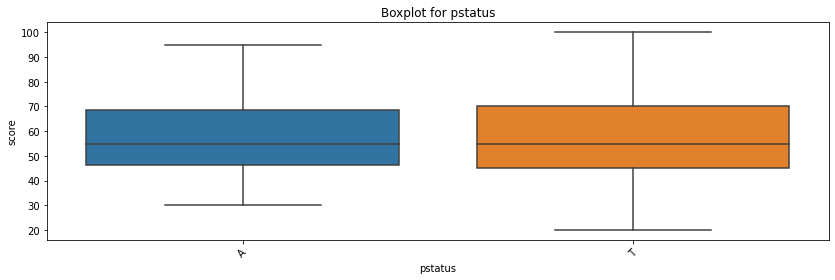

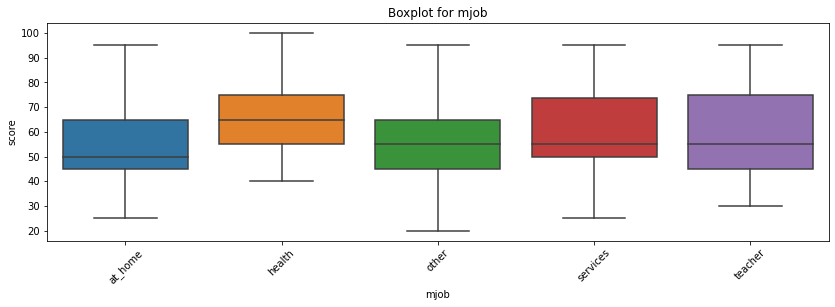

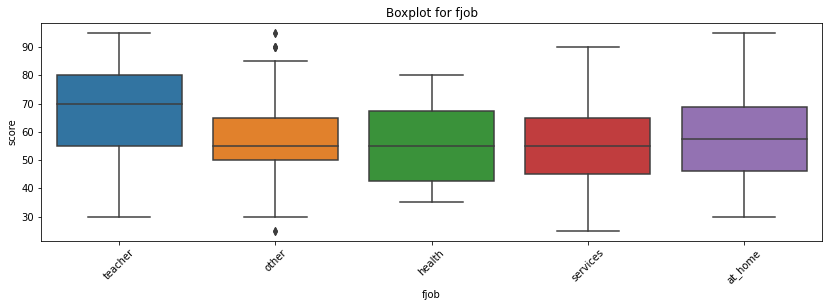

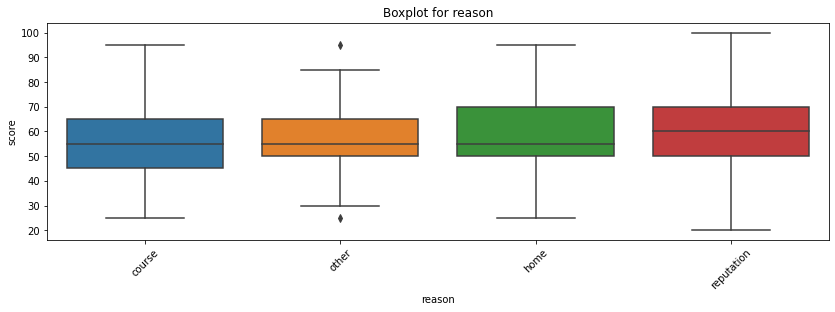

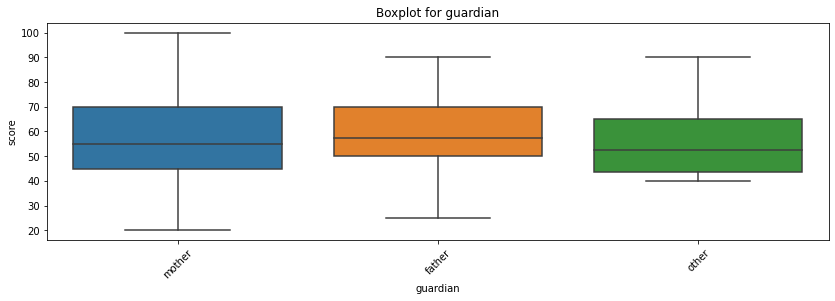

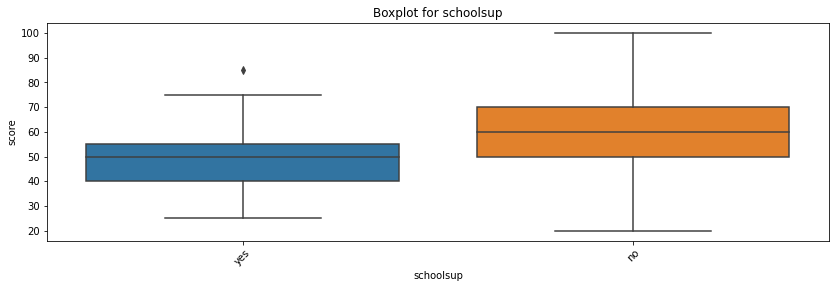

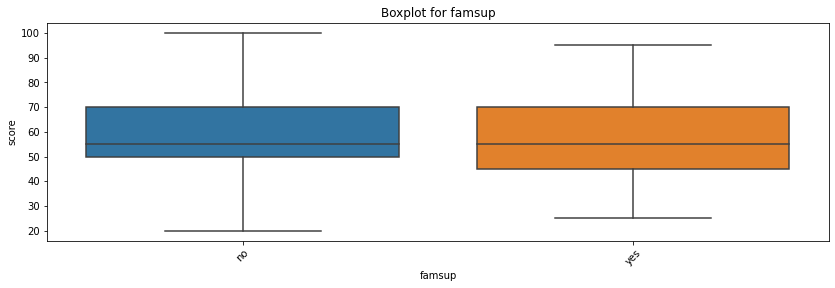

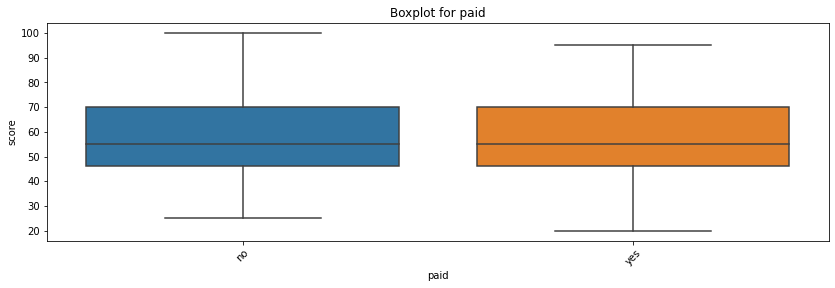

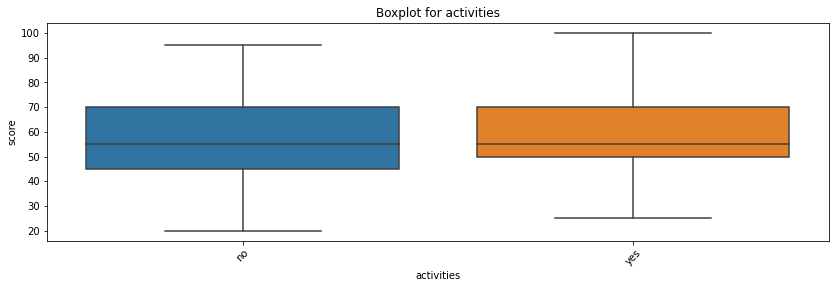

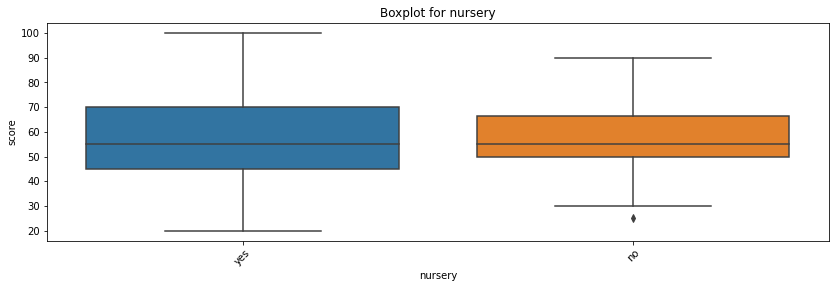

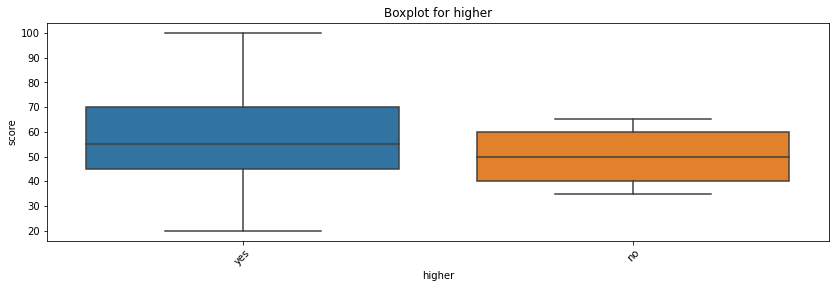

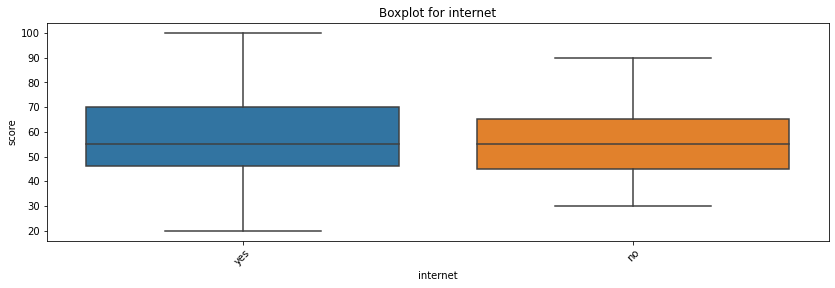

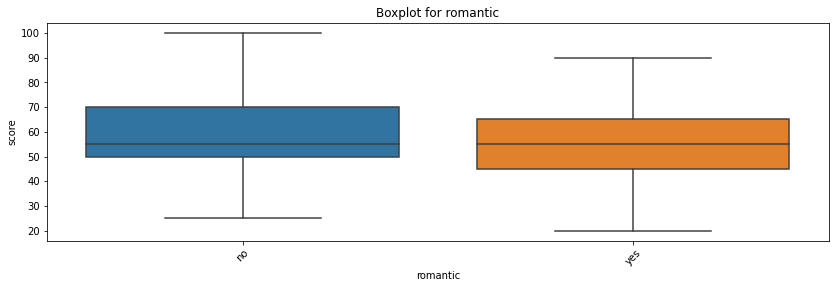

In [50]:
for col in list_obj_col:
    get_boxplot(stud_original, col)

In [51]:
for col in list_obj_col:
    get_stat_dif(stud_original, col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки mjob
Найдены статистически значимые различия для колонки fjob
Найдены статистически значимые различия для колонки schoolsup


### *Датасет с заменами*

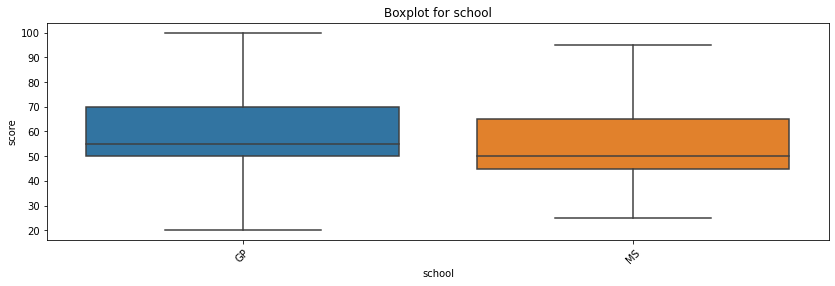

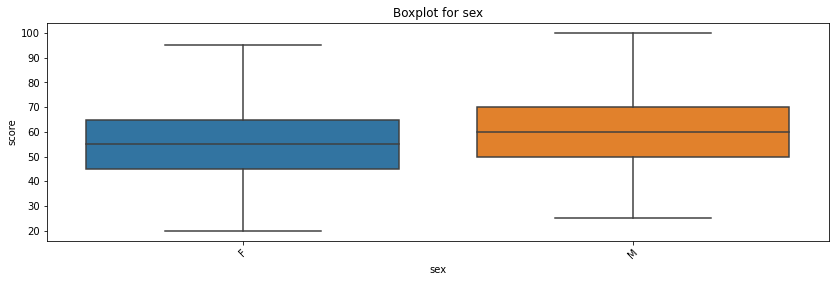

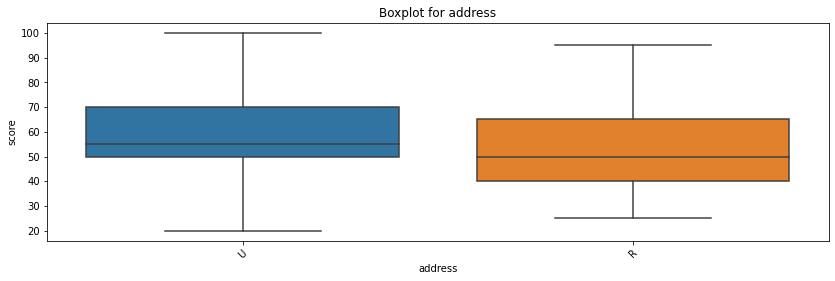

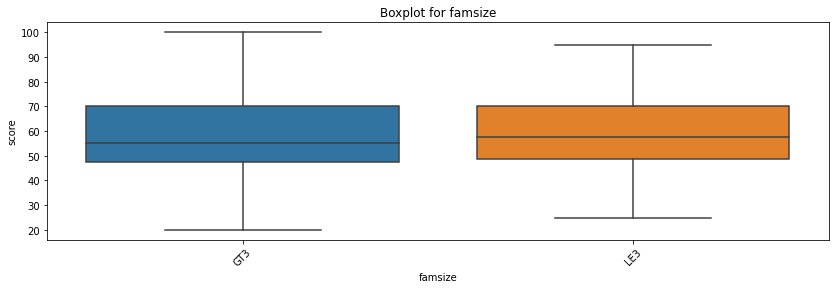

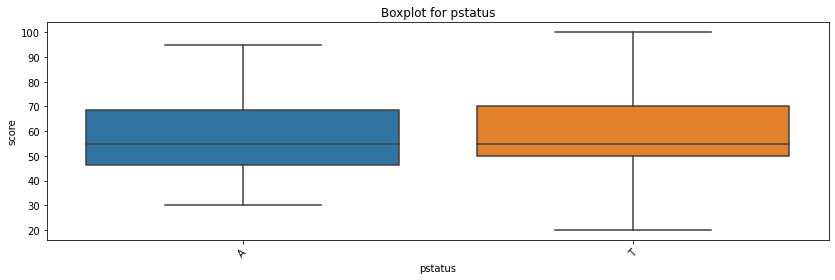

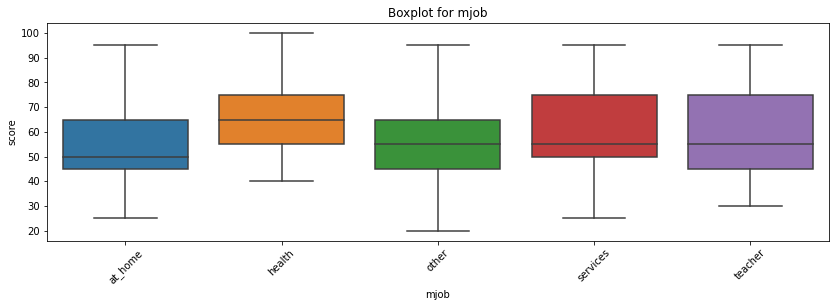

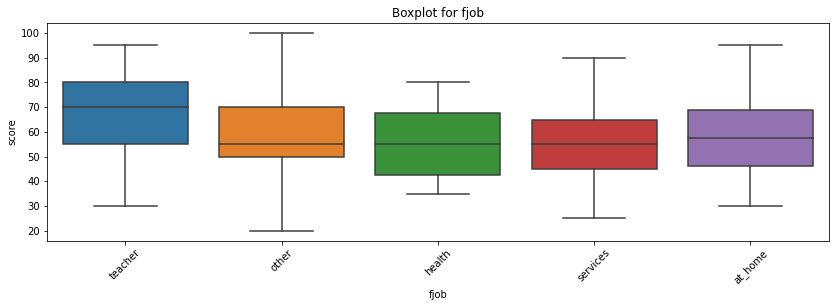

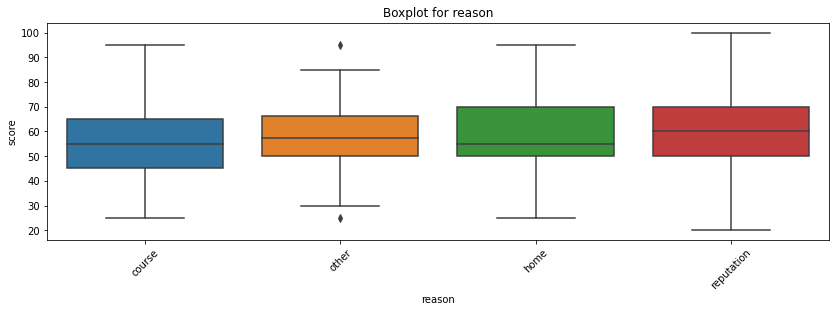

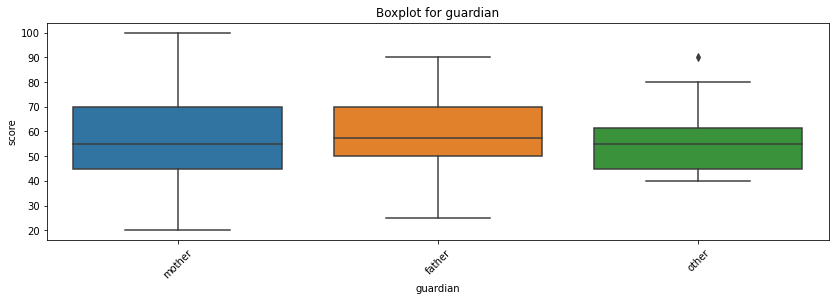

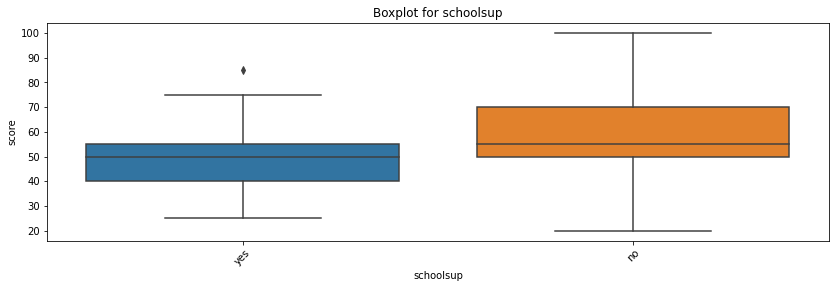

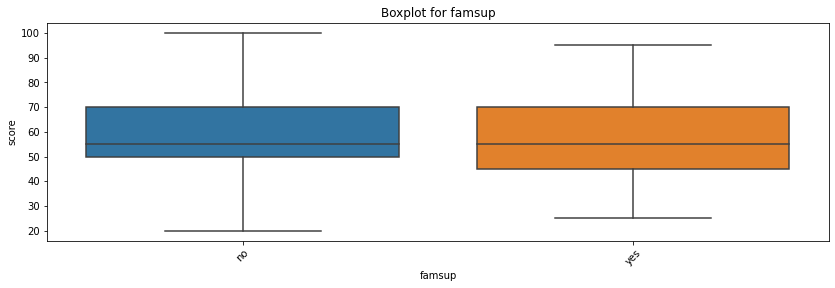

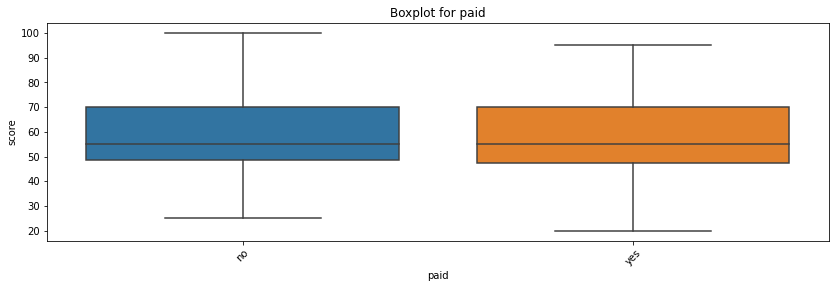

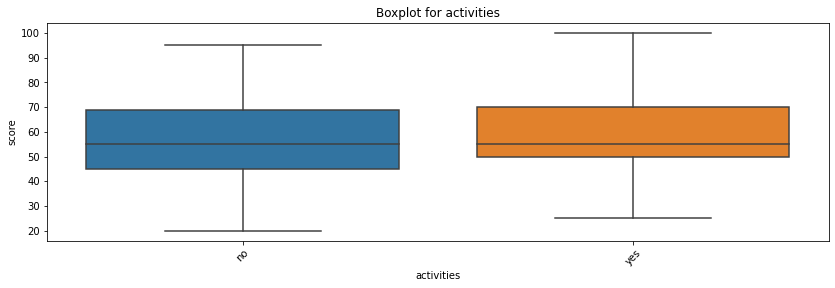

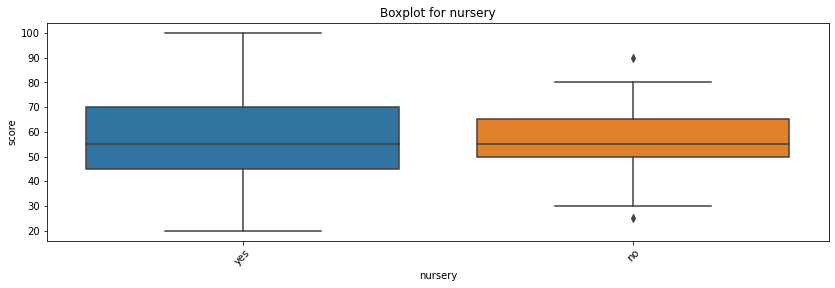

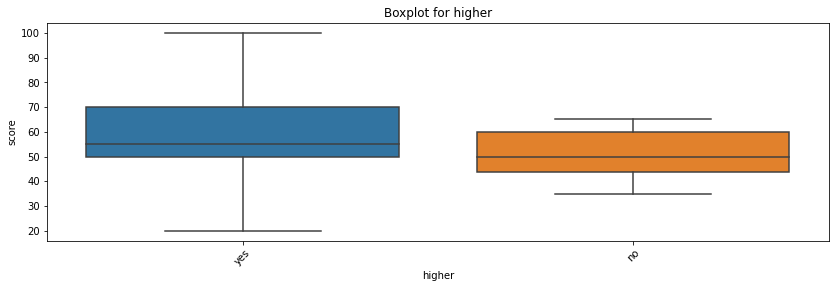

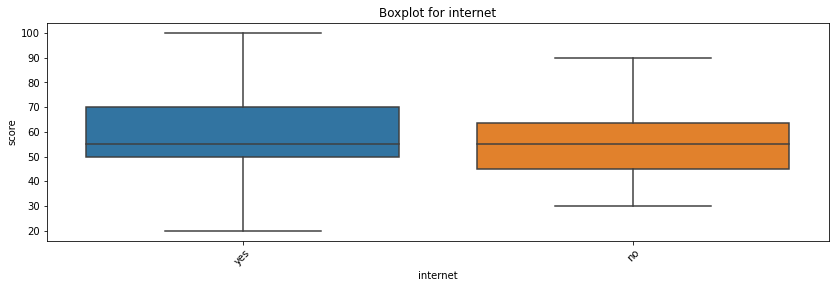

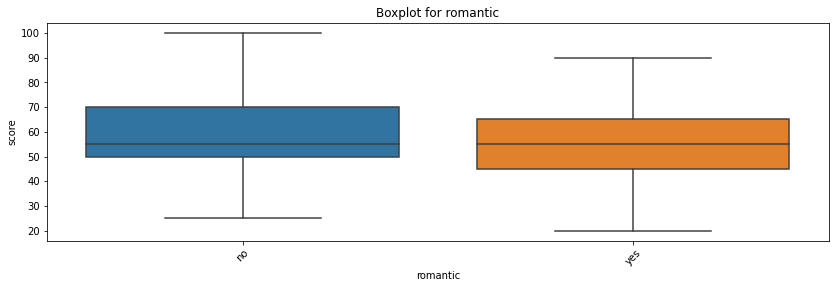

In [52]:
for col in list_obj_col:
    get_boxplot(students, col)

In [53]:
for col in list_obj_col:
    get_stat_dif(students, col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки mjob
Найдены статистически значимые различия для колонки fjob
Найдены статистически значимые различия для колонки schoolsup


### *Первичные выводы по анализу номинативных данных:*
1. Анализ обоих датасетов показал одинаковые данные, значит нам подойдут для глубокого анализа оба датасета
2. По графикам кажется, что все колонки так или иначе влияют на успеваемость
3. Для дальнейшего построения модели обязательно оставим в датасете колонки: **address**, **mjob**, **fjob**, **schoolsup**
4. Не все мои предположения оказались правдой

***
## Выводы

Итак, в результате **`EDA`** для анализа влияния различных параметров на успеваемость были получены следующие выводы:

1. В данных достаточно мало пустых значений
2. Выбросы найдены только в столбцах ***students***, ***fedu***, ***traveltime***, ***studytime***, ***famrel***, ***freetime***, ***absences***, ***score***. Выбросов немного, поэтому данные можно считать достаточно чистыми.
3. Положительная корреляция параметров  ***medu***, ***fedu***, ***studytime***, ***famrel*** может говорить о следующем:
    * Чем выше образование родителей, тем выше успеваемость ребенка
    * Чем больше времени учащийся посвящает учебе, тем выше успеваемость
    * Отношения в семье также влияют на успеваемость. Чем взаимоотношения лучше, тем успеваемость выше.
4. Отрицательная корреляция говорит нам об обратном. С увеличением показателя того или иного параметра успеваемость падает.
5. Статистически важные параметры из _номинативных_ - **address**, **mjob**, **fjob**, **schoolsup**.
6. Из _числовых_ нам не важен параметр **studytime, granular**, т.к. он полностью коррелирует с другим параметром (*studytime*)
---
# Итоговый датасет:


In [64]:
result_columns = []
for column in students.columns:
    if students[column].dtypes in ['int64', 'float64']:
        result_columns.append(column)
for column in ['address', 'mjob', 'fjob', 'schoolsup']:
    result_columns.append(column)

students_result = students
for col in students_result.columns:
    if col not in result_columns:
        students_result.drop([col], inplace = True, axis = 1)
        
students_result.head(10)

,age,address,medu,fedu,mjob,fjob,traveltime,studytime,failures,schoolsup,famrel,freetime,goout,health,absences,score
0,18,U,4.0,4.0,at_home,teacher,2.0,2.0,0.0,yes,4.0,3.0,4.0,3.0,6.0,30.0
1,17,U,1.0,1.0,at_home,other,1.0,2.0,0.0,no,5.0,3.0,3.0,3.0,4.0,30.0
2,15,U,1.0,1.0,at_home,other,1.0,2.0,3.0,yes,4.0,3.0,2.0,3.0,10.0,50.0
3,15,U,4.0,2.0,health,other,1.0,3.0,0.0,no,3.0,2.0,2.0,5.0,2.0,75.0
4,16,U,3.0,3.0,other,other,1.0,2.0,0.0,no,4.0,3.0,2.0,5.0,4.0,50.0
5,16,U,4.0,3.0,services,other,1.0,2.0,0.0,no,5.0,4.0,2.0,5.0,10.0,75.0
6,16,U,2.0,2.0,other,other,1.0,2.0,0.0,no,4.0,4.0,4.0,3.0,0.0,55.0
7,17,U,4.0,4.0,other,teacher,2.0,2.0,0.0,yes,4.0,1.0,4.0,1.0,6.0,30.0
8,15,U,3.0,2.0,services,other,1.0,2.0,0.0,no,4.0,2.0,2.0,1.0,0.0,95.0
9,15,U,3.0,4.0,other,other,1.0,2.0,0.0,no,5.0,5.0,1.0,5.0,0.0,75.0
